In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
bit_widths = [16, 12, 8, 4, 3, 2]
perplexities_wikitext = [7.84437, 7.84512, 7.84892, 9.04957, 493.19674, 39333.73437]
perplexities_ptb = [13.30318, 13.30268, 13.31968, 15.017685, 1011.5947, 44558.2539]

### 3次多项式

In [15]:
# 多项式拟合
poly_degree = 3
coeffs_wikitext = np.polyfit(bit_widths, perplexities_wikitext, poly_degree)
coeffs_ptb = np.polyfit(bit_widths, perplexities_ptb, poly_degree)

# 生成拟合曲线
bit_widths_fit = np.linspace(min(bit_widths), max(bit_widths), 100)
poly_fit_wikitext = np.polyval(coeffs_wikitext, bit_widths_fit)
poly_fit_ptb = np.polyval(coeffs_ptb, bit_widths_fit)

### 对数模型的形式为 y=a⋅ln⁡(x)+by

In [12]:
from scipy.optimize import curve_fit

# 对数模型
def log_model(x, a, b):
    return a * np.log(x) + b

# 对数拟合
params_wikitext, _ = curve_fit(log_model, bit_widths, perplexities_wikitext)
params_ptb, _ = curve_fit(log_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
log_fit_wikitext = log_model(bit_widths_fit, *params_wikitext)
log_fit_ptb = log_model(bit_widths_fit, *params_ptb)

### 指数衰减模型，形式为 y=a⋅e^{−b⋅x}+cy

In [13]:
# 指数衰减模型
def exp_decay_model(x, a, b, c):
    return a * np.exp(-b * x) + c

# 指数衰减拟合
params_exp_wikitext, _ = curve_fit(exp_decay_model, bit_widths, perplexities_wikitext)
params_exp_ptb, _ = curve_fit(exp_decay_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
exp_fit_wikitext = exp_decay_model(bit_widths_fit, *params_exp_wikitext)
exp_fit_ptb = exp_decay_model(bit_widths_fit, *params_exp_ptb)

/tmp/ipykernel_2884/445165774.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


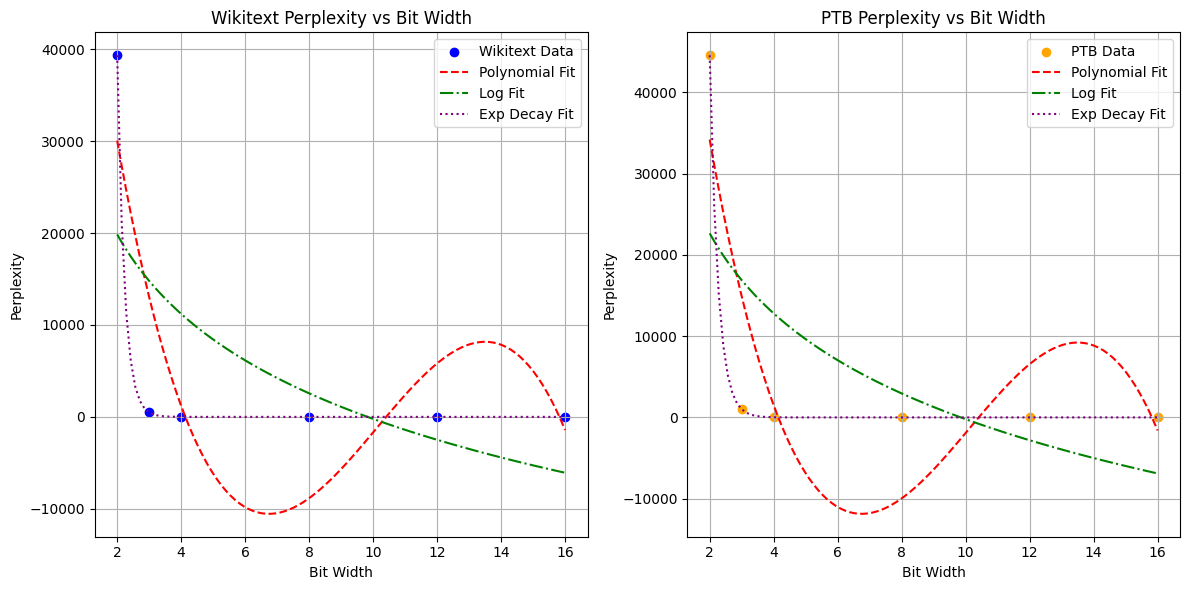

In [16]:
# 绘图
plt.figure(figsize=(12, 6))

# Wikitext 数据
plt.subplot(1, 2, 1)
plt.scatter(bit_widths, perplexities_wikitext, label='Wikitext Data', color='blue')
plt.plot(bit_widths_fit, poly_fit_wikitext, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_wikitext, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_wikitext, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Bit Width')
plt.ylabel('Perplexity')
plt.title('Wikitext Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

# PTB 数据
plt.subplot(1, 2, 2)
plt.scatter(bit_widths, perplexities_ptb, label='PTB Data', color='orange')
plt.plot(bit_widths_fit, poly_fit_ptb, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_ptb, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_ptb, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Bit Width')
plt.ylabel('Perplexity')
plt.title('PTB Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
bit_widths = np.array([16, 12, 8, 4, 3, 2])
perplexities_wikitext = np.array([7.84437, 7.84512, 7.84892, 9.04957, 493.19674, 39333.73437])
perplexities_ptb = np.array([13.30318, 13.30268, 13.31968, 15.017685, 1011.5947, 44558.2539])

# 多项式拟合
def poly_fit_and_residuals(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    y_fit = np.polyval(coeffs, x)
    residuals = np.sum((y - y_fit) ** 2)
    return coeffs, residuals

# 对数拟合
def log_fit_and_residuals(x, y):
    def log_model(x, a, b):
        return a * np.log(x) + b
    params, _ = curve_fit(log_model, x, y)
    y_fit = log_model(x, *params)
    residuals = np.sum((y - y_fit) ** 2)
    return params, residuals

# 指数衰减拟合
def exp_decay_fit_and_residuals(x, y):
    def exp_decay_model(x, a, b, c):
        return a * np.exp(-b * x) + c
    params, _ = curve_fit(exp_decay_model, x, y)
    y_fit = exp_decay_model(x, *params)
    residuals = np.sum((y - y_fit) ** 2)
    return params, residuals

# 计算拟合结果和残差
# Wikitext 数据
poly_coeffs_wikitext, poly_residuals_wikitext = poly_fit_and_residuals(bit_widths, perplexities_wikitext, 3)
log_params_wikitext, log_residuals_wikitext = log_fit_and_residuals(bit_widths, perplexities_wikitext)
exp_params_wikitext, exp_residuals_wikitext = exp_decay_fit_and_residuals(bit_widths, perplexities_wikitext)

# PTB 数据
poly_coeffs_ptb, poly_residuals_ptb = poly_fit_and_residuals(bit_widths, perplexities_ptb, 3)
log_params_ptb, log_residuals_ptb = log_fit_and_residuals(bit_widths, perplexities_ptb)
exp_params_ptb, exp_residuals_ptb = exp_decay_fit_and_residuals(bit_widths, perplexities_ptb)

# 输出拟合结果和残差
def print_fit_results(name, poly_coeffs, log_params, exp_params, poly_residuals, log_residuals, exp_residuals):
    print(f"=== {name} ===")
    print("多项式拟合公式:")
    print(f"y = {poly_coeffs[0]:.6f}x^3 + {poly_coeffs[1]:.6f}x^2 + {poly_coeffs[2]:.6f}x + {poly_coeffs[3]:.6f}")
    print(f"多项式拟合残差: {poly_residuals:.6f}")
    print("\n对数拟合公式:")
    print(f"y = {log_params[0]:.6f} * ln(x) + {log_params[1]:.6f}")
    print(f"对数拟合残差: {log_residuals:.6f}")
    print("\n指数衰减拟合公式:")
    print(f"y = {exp_params[0]:.6f} * e^(-{exp_params[1]:.6f}x) + {exp_params[2]:.6f}")
    print(f"指数衰减拟合残差: {exp_residuals:.6f}")
    print("\n")

# 输出 Wikitext 结果
print_fit_results("Wikitext", poly_coeffs_wikitext, log_params_wikitext, exp_params_wikitext,
                  poly_residuals_wikitext, log_residuals_wikitext, exp_residuals_wikitext)

# 输出 PTB 结果
print_fit_results("PTB", poly_coeffs_ptb, log_params_ptb, exp_params_ptb,
                  poly_residuals_ptb, log_residuals_ptb, exp_residuals_ptb)

=== Wikitext ===
多项式拟合公式:
y = -121.349913x^3 + 3684.169939x^2 + -33129.007240x + 82542.625708
多项式拟合残差: 358982360.882298

对数拟合公式:
y = -12464.455800 * ln(x) + 28487.192716
对数拟合残差: 759359657.719042

指数衰减拟合公式:
y = 257047294.595254 * e^(-4.392551x) + 6.665105
指数衰减拟合残差: 17.386911


=== PTB ===
多项式拟合公式:
y = -137.119467x^3 + 4165.281787x^2 + -37492.395634x + 93610.407847
多项式拟合残差: 447977231.342318

对数拟合公式:
y = -14205.774816 * ln(x) + 32499.730446
对数拟合残差: 959890440.604198

指数衰减拟合公式:
y = 87958349.509589 * e^(-3.794003x) + 8.270760
指数衰减拟合残差: 326.827213




/tmp/ipykernel_2884/4255056254.py:29: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


# 量化位宽同原位宽的差值与困惑度的变化关系

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
bit_widths = [0, 4, 8, 12, 13, 14]
perplexities_wikitext = [7.84437, 7.84512, 7.84892, 9.04957, 493.19674, 39333.73437]
perplexities_ptb = [13.30318, 13.30268, 13.31968, 15.017685, 1011.5947, 44558.2539]

In [31]:
# 多项式拟合
poly_degree = 3
coeffs_wikitext = np.polyfit(bit_widths, perplexities_wikitext, poly_degree)
coeffs_ptb = np.polyfit(bit_widths, perplexities_ptb, poly_degree)

# 生成拟合曲线
bit_widths_fit = np.linspace(min(bit_widths), max(bit_widths), 100)
poly_fit_wikitext = np.polyval(coeffs_wikitext, bit_widths_fit)
poly_fit_ptb = np.polyval(coeffs_ptb, bit_widths_fit)

In [32]:
from scipy.optimize import curve_fit

# 对数模型
def log_model(x, a, b):
    return a * np.log(x) + b

# 对数拟合
params_wikitext, _ = curve_fit(log_model, bit_widths, perplexities_wikitext)
params_ptb, _ = curve_fit(log_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
log_fit_wikitext = log_model(bit_widths_fit, *params_wikitext)
log_fit_ptb = log_model(bit_widths_fit, *params_ptb)

/tmp/ipykernel_2884/3551705673.py:5: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b
/tmp/ipykernel_2884/3551705673.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  params_wikitext, _ = curve_fit(log_model, bit_widths, perplexities_wikitext)
/tmp/ipykernel_2884/3551705673.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  params_ptb, _ = curve_fit(log_model, bit_widths, perplexities_ptb)


In [33]:
# 指数衰减模型
def exp_decay_model(x, a, b, c):
    return a * np.exp(-b * x) + c

# 指数衰减拟合
params_exp_wikitext, _ = curve_fit(exp_decay_model, bit_widths, perplexities_wikitext)
params_exp_ptb, _ = curve_fit(exp_decay_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
exp_fit_wikitext = exp_decay_model(bit_widths_fit, *params_exp_wikitext)
exp_fit_ptb = exp_decay_model(bit_widths_fit, *params_exp_ptb)

/tmp/ipykernel_2884/445165774.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params_exp_wikitext, _ = curve_fit(exp_decay_model, bit_widths, perplexities_wikitext)
/tmp/ipykernel_2884/445165774.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params_exp_ptb, _ = curve_fit(exp_decay_model, bit_widths, perplexities_ptb)


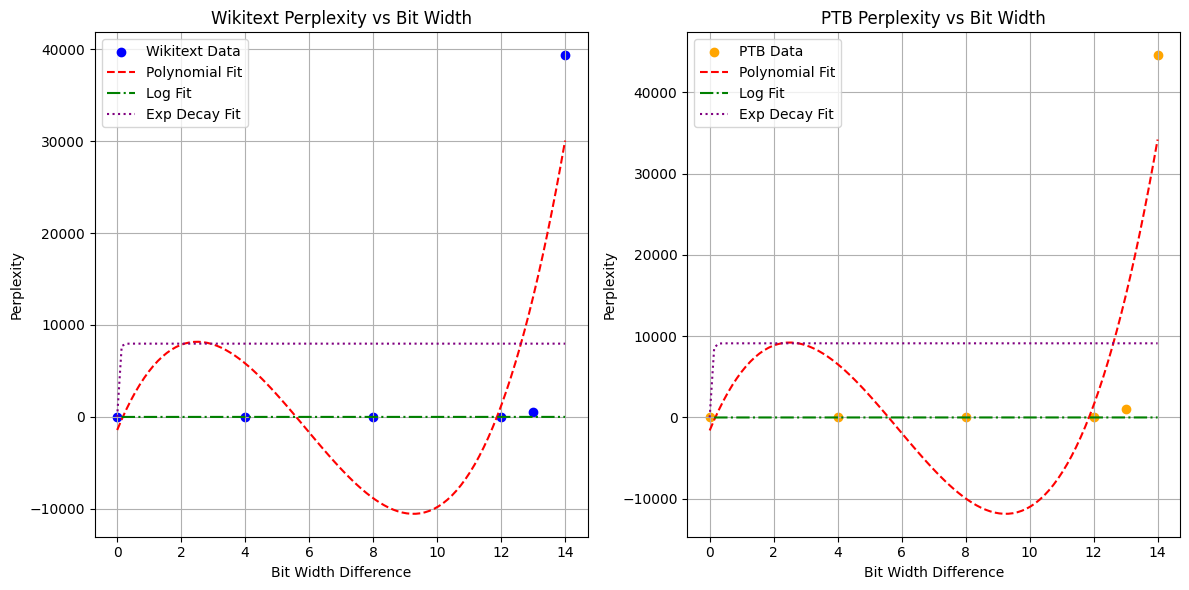

In [35]:
# 绘图
plt.figure(figsize=(12, 6))

# Wikitext 数据
plt.subplot(1, 2, 1)
plt.scatter(bit_widths, perplexities_wikitext, label='Wikitext Data', color='blue')
plt.plot(bit_widths_fit, poly_fit_wikitext, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_wikitext, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_wikitext, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Bit Width Difference')
plt.ylabel('Perplexity')
plt.title('Wikitext Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

# PTB 数据
plt.subplot(1, 2, 2)
plt.scatter(bit_widths, perplexities_ptb, label='PTB Data', color='orange')
plt.plot(bit_widths_fit, poly_fit_ptb, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_ptb, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_ptb, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Bit Width Difference')
plt.ylabel('Perplexity')
plt.title('PTB Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 量化位宽压缩率与困惑度的变化关系

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
bit_widths = [1, 1.5, 2, 3, 4, 6]
perplexities_wikitext = [7.84437, 7.84512, 7.84892, 9.04957, 493.19674, 39333.73437]
perplexities_ptb = [13.30318, 13.30268, 13.31968, 15.017685, 1011.5947, 44558.2539]

In [37]:
# 多项式拟合
poly_degree = 3
coeffs_wikitext = np.polyfit(bit_widths, perplexities_wikitext, poly_degree)
coeffs_ptb = np.polyfit(bit_widths, perplexities_ptb, poly_degree)

# 生成拟合曲线
bit_widths_fit = np.linspace(min(bit_widths), max(bit_widths), 100)
poly_fit_wikitext = np.polyval(coeffs_wikitext, bit_widths_fit)
poly_fit_ptb = np.polyval(coeffs_ptb, bit_widths_fit)

In [38]:
from scipy.optimize import curve_fit

# 对数模型
def log_model(x, a, b):
    return a * np.log(x) + b

# 对数拟合
params_wikitext, _ = curve_fit(log_model, bit_widths, perplexities_wikitext)
params_ptb, _ = curve_fit(log_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
log_fit_wikitext = log_model(bit_widths_fit, *params_wikitext)
log_fit_ptb = log_model(bit_widths_fit, *params_ptb)

In [39]:
# 指数衰减模型
def exp_decay_model(x, a, b, c):
    return a * np.exp(-b * x) + c

# 指数衰减拟合
params_exp_wikitext, _ = curve_fit(exp_decay_model, bit_widths, perplexities_wikitext)
params_exp_ptb, _ = curve_fit(exp_decay_model, bit_widths, perplexities_ptb)

# 生成拟合曲线
exp_fit_wikitext = exp_decay_model(bit_widths_fit, *params_exp_wikitext)
exp_fit_ptb = exp_decay_model(bit_widths_fit, *params_exp_ptb)

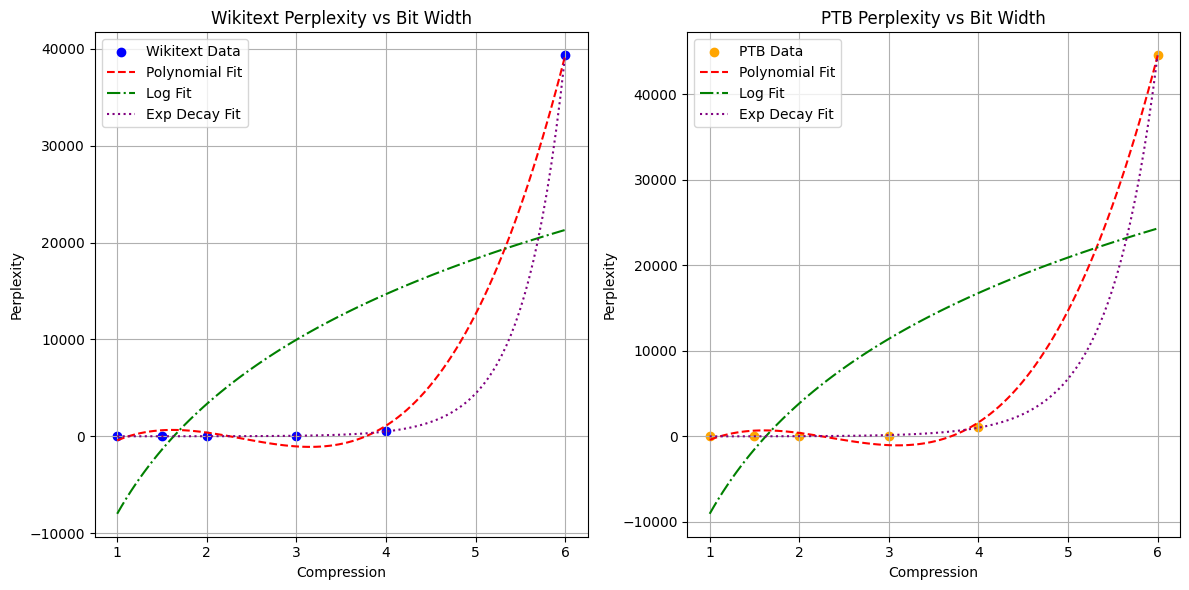

In [40]:
# 绘图
plt.figure(figsize=(12, 6))

# Wikitext 数据
plt.subplot(1, 2, 1)
plt.scatter(bit_widths, perplexities_wikitext, label='Wikitext Data', color='blue')
plt.plot(bit_widths_fit, poly_fit_wikitext, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_wikitext, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_wikitext, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Compression')
plt.ylabel('Perplexity')
plt.title('Wikitext Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

# PTB 数据
plt.subplot(1, 2, 2)
plt.scatter(bit_widths, perplexities_ptb, label='PTB Data', color='orange')
plt.plot(bit_widths_fit, poly_fit_ptb, label='Polynomial Fit', linestyle='--', color='red')
plt.plot(bit_widths_fit, log_fit_ptb, label='Log Fit', linestyle='-.', color='green')
plt.plot(bit_widths_fit, exp_fit_ptb, label='Exp Decay Fit', linestyle=':', color='purple')
plt.xlabel('Compression')
plt.ylabel('Perplexity')
plt.title('PTB Perplexity vs Bit Width')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
bit_widths = np.array([1, 1.5, 2, 3, 4, 6])
perplexities_wikitext = np.array([7.84437, 7.84512, 7.84892, 9.04957, 493.19674, 39333.73437])
perplexities_ptb = np.array([13.30318, 13.30268, 13.31968, 15.017685, 1011.5947, 44558.2539])

# 多项式拟合
def poly_fit_and_residuals(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    y_fit = np.polyval(coeffs, x)
    residuals = np.sum((y - y_fit) ** 2)
    return coeffs, residuals

# 对数拟合
def log_fit_and_residuals(x, y):
    def log_model(x, a, b):
        return a * np.log(x) + b
    params, _ = curve_fit(log_model, x, y)
    y_fit = log_model(x, *params)
    residuals = np.sum((y - y_fit) ** 2)
    return params, residuals

# 指数衰减拟合
def exp_decay_fit_and_residuals(x, y):
    def exp_decay_model(x, a, b, c):
        return a * np.exp(-b * x) + c
    params, _ = curve_fit(exp_decay_model, x, y)
    y_fit = exp_decay_model(x, *params)
    residuals = np.sum((y - y_fit) ** 2)
    return params, residuals

# 计算拟合结果和残差
# Wikitext 数据
poly_coeffs_wikitext, poly_residuals_wikitext = poly_fit_and_residuals(bit_widths, perplexities_wikitext, 3)
log_params_wikitext, log_residuals_wikitext = log_fit_and_residuals(bit_widths, perplexities_wikitext)
exp_params_wikitext, exp_residuals_wikitext = exp_decay_fit_and_residuals(bit_widths, perplexities_wikitext)

# PTB 数据
poly_coeffs_ptb, poly_residuals_ptb = poly_fit_and_residuals(bit_widths, perplexities_ptb, 3)
log_params_ptb, log_residuals_ptb = log_fit_and_residuals(bit_widths, perplexities_ptb)
exp_params_ptb, exp_residuals_ptb = exp_decay_fit_and_residuals(bit_widths, perplexities_ptb)

# 输出拟合结果和残差
def print_fit_results(name, poly_coeffs, log_params, exp_params, poly_residuals, log_residuals, exp_residuals):
    print(f"=== {name} ===")
    print("多项式拟合公式:")
    print(f"y = {poly_coeffs[0]:.6f}x^3 + {poly_coeffs[1]:.6f}x^2 + {poly_coeffs[2]:.6f}x + {poly_coeffs[3]:.6f}")
    print(f"多项式拟合残差: {poly_residuals:.6f}")
    print("\n对数拟合公式:")
    print(f"y = {log_params[0]:.6f} * ln(x) + {log_params[1]:.6f}")
    print(f"对数拟合残差: {log_residuals:.6f}")
    print("\n指数衰减拟合公式:")
    print(f"y = {exp_params[0]:.6f} * e^(-{exp_params[1]:.6f}x) + {exp_params[2]:.6f}")
    print(f"指数衰减拟合残差: {exp_residuals:.6f}")
    print("\n")

# 输出 Wikitext 结果
print_fit_results("Wikitext", poly_coeffs_wikitext, log_params_wikitext, exp_params_wikitext,
                  poly_residuals_wikitext, log_residuals_wikitext, exp_residuals_wikitext)

# 输出 PTB 结果
print_fit_results("PTB", poly_coeffs_ptb, log_params_ptb, exp_params_ptb,
                  poly_residuals_ptb, log_residuals_ptb, exp_residuals_ptb)

=== Wikitext ===
多项式拟合公式:
y = 967.675199x^3 + -6926.370714x^2 + 14815.280871x + -9289.060249
多项式拟合残差: 2178099.361713

对数拟合公式:
y = 16357.355452 * ln(x) + -8010.970048
对数拟合残差: 702401500.693945

指数衰减拟合公式:
y = 0.077509 * e^(--2.189560x) + -6.317353
指数衰减拟合残差: 2019.751871


=== PTB ===
多项式拟合公式:
y = 1054.312471x^3 + -7444.667376x^2 + 15763.589412x + -9810.086649
多项式拟合残差: 2230140.739789

对数拟合公式:
y = 18629.662961 * ln(x) + -9085.805648
对数拟合残差: 886945630.470054

指数衰减拟合公式:
y = 0.527680 * e^(--1.890741x) + -27.746804
指数衰减拟合残差: 15537.226313


